In [13]:
import pandas as pd
import re
import numpy as np
from DAL_Class_1 import DAL
import processing_functions
from datetime import datetime
from site_information_class import SiteDataProcessor
import tkinter as tk
from tkinter import simpledialog, scrolledtext 
from tkinter import ttk
from PIL import Image, ImageTk
from tkinter import messagebox
import math
import os
from Class_tkinter import SiteInformationApp  
import matplotlib.pyplot as plt

Runs the downloader window

In [14]:
if __name__ == "__main__":
    root = tk.Tk()
    app = SiteInformationApp(root)
    root.mainloop()
    # Access the DataFrame after the main loop
    df_spill_hours = app.df_spill_hours
    #df_rainfall_raw = app.df_rainfall_global
    #df_raw_sump = app.df_raw_sump_global
    #df_hour_agg_flow_meter_raw = app.df_hour_agg_flow_meter_global
    #df_raw_flow_meter = app.df_raw_flow_meter_global
    start_date_downloaded = app.start_date_global
    end_date_downloaded = app.end_date_global
    site_id_selected = app.site_id


Established Connection
Closed Connection
2021-01-01 2022-01-01 default_sump_address default_source_sump
Established Connection
Closed Connection


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\RMCGINT\OneDrive - Wessex Water\Python\WWDS project\scripts\DAL_Class_1.py", line 64, in query
    cursor.execute(sqlQuery)
pyodbc.ProgrammingError: ('42000', '[42000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Error converting data type varchar to bigint. (8114) (SQLExecDirectW)')

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\RMCGINT\AppData\Local\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "c:\Users\RMCGINT\OneDrive - Wessex Water\Python\WWDS project\scripts\Class_tkinter.py", line 267, in <lambda>
    btn_run_query = tk.Button(spill_query_window, text="Run Query", command=lambda: self.run_spill_query(entry_spill_level.get(), start_year.get(), start_month.get(), start_day.get(), end_year.get(), end_month.get(), end_day.get()))
              

Selected DB Addr: E11943
Selected Source: Waste
2023-01-01 2023-07-01 11943 Waste
Established Connection
Closed Connection
Head of df_spill_hours:
   Hour  DbAddr  count  mean_EValue  stddev_EValue  min_EValue  max_EValue  \
0     0   11943     12   100.951457       0.007253  100.942871  100.961426   
1     1   11943     12   100.959839       0.010243  100.942871  100.974609   
2    10   11943     12   100.889730       0.060501  100.764160  100.956055   
3    11   11943     12   100.892700       0.063361  100.775879  100.966309   
4    12   11943     12   100.672078       0.114818  100.510742  100.875977   

   5percentile  50percentile  95percentile  CountofOutOfDate  \
0   100.943140    100.950928    100.960889                 0   
1   100.945825    100.964600    100.971655                 0   
2   100.777319    100.903564    100.949878                 0   
3   100.806226    100.899902    100.964160                 0   
4   100.520679    100.658936    100.842944                 0   


Saves the downloaded dataframes into the /raw folder

In [3]:
# Define file paths
file_paths = {
    "df_spill_hours": "../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_spill_hours.xlsx",
    #"df_rainfall_raw": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_rainfall_raw.xlsx",
    #"df_raw_sump": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_raw_sump.xlsx",
    #"df_hour_agg_flow_meter_raw": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_hour_agg_flow_meter_raw.xlsx",
    #"df_raw_flow_meter": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_raw_flow_meter.xlsx"
}

# Function to save dataframes to xlsx files
def save_dataframes(**kwargs):
    for name, df in kwargs.items():
        file_path = file_paths.get(name)
        if file_path:
            df.to_excel(file_path, index=False)
            print(f"{name} saved to {file_path}")

# Example usage:
# Assuming the dataframes are already defined and available as variables
# df_spill_hours, df_rainfall, df_raw_sump, df_hour_agg_flow_meter, df_raw_flow_meter

# Save the dataframes
save_dataframes(
    df_spill_hours=df_spill_hours,
    #df_rainfall_raw=df_rainfall_raw,
    #df_raw_sump=df_raw_sump,
    #df_hour_agg_flow_meter_raw=df_hour_agg_flow_meter_raw
    #df_raw_flow_meter=df_raw_flow_meter
)



df_spill_hours saved to ../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_spill_hours.xlsx


Imports the downloaded data from excel workbooks - skip this if already in the environment from the DAL

In [ ]:

import os
import pandas as pd

site_id_selected = 19505
start_date_downloaded = '2023-01-01'
end_date_downloaded = '2024-01-01'

file_paths = {
    "df_spill_hours": "../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_spill_hours.xlsx",
    #"df_rainfall_raw": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_rainfall_raw.xlsx",
    #"df_raw_sump": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_raw_sump.xlsx",
    #"df_hour_agg_flow_meter_raw": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_hour_agg_flow_meter_raw.xlsx",
    #"df_raw_flow_meter": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_raw_flow_meter.xlsx"
}

# Function to load dataframes from xlsx files if they exist
def load_dataframes():
    dataframes = {}
    for name, file_path in file_paths.items():
        if os.path.exists(file_path):
            dataframes[name] = pd.read_excel(file_path)
            print(f"{name} loaded from {file_path}")
        else:
            dataframes[name] = None
            print(f"{file_path} does not exist. {name} not loaded.")
    return dataframes

# Load the dataframes if they exist
loaded_dataframes = load_dataframes()

# Access the loaded dataframes
#df_spill_hours = loaded_dataframes["df_spill_hours"]

df_rainfall_raw = loaded_dataframes["df_rainfall_raw"]
df_raw_sump = loaded_dataframes["df_raw_sump"]
df_hour_agg_flow_meter_raw = loaded_dataframes["df_hour_agg_flow_meter_raw"]
#df_raw_flow_meter = loaded_dataframes["df_raw_flow_meter"]


This runs the time series viewer / rtk optimizer

c:\Users\RMCGINT\OneDrive - Wessex Water\Python\WWDS project\scripts\processing_functions.py:417: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_rainfall_filtered['Intensity(mm/hr)'] = df_rainfall_filtered['Intensity(mm/hr)'].fillna(0).infer_objects(copy=False)
c:\Users\RMCGINT\OneDrive - Wessex Water\Python\WWDS project\scripts\processing_functions.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_rainfall_hour_agg = df_rainfall_filtered.resample('H').sum(numeric_only=True) / 12


Optimized RTK Parameters Set 1: R1 = 1.42, T1 = 0.93, K1 = 3.40
Optimized RTK Parameters Set 2: R2 = 1.50, T2 = 6.27, K2 = 9.52
Plotting synthetic flow
                 TimeGMT  SyntheticFlow
4397 2023-07-03 10:00:00       0.815979
4398 2023-07-03 11:00:00       1.021941
4399 2023-07-03 12:00:00       1.753585
4400 2023-07-03 13:00:00       1.643779
4401 2023-07-03 14:00:00       1.532861
2023-07-03 09:51:31.588185785 to 2023-08-26 14:08:28.411814215
              TimeGMT  SyntheticFlow
0 2023-01-01 05:00:00       0.000000
1 2023-01-01 06:00:00       0.081648
2 2023-01-01 07:00:00       0.071217
3 2023-01-01 08:00:00       0.060785
4 2023-01-01 09:00:00       0.050353
Plotting synthetic flow
                 TimeGMT  SyntheticFlow
4733 2023-07-17 10:00:00      12.772352
4734 2023-07-17 11:00:00      12.351312
4735 2023-07-17 12:00:00      12.022479
4736 2023-07-17 13:00:00      11.690675
4737 2023-07-17 14:00:00      11.317828
2023-07-17 09:51:31.588185785 to 2023-09-09 14:08:28.411814

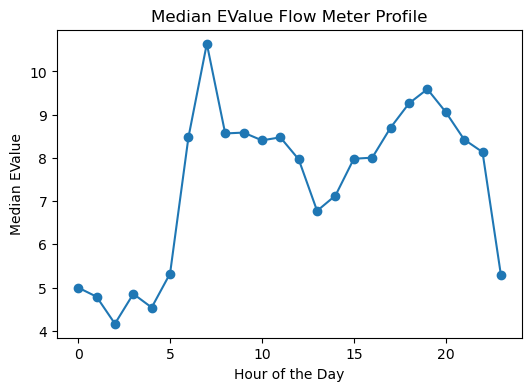

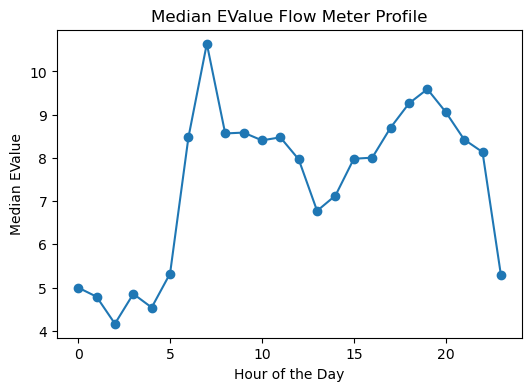

In [ ]:
'''
df_sump_filtered = df_raw_sump
df_sump_filtered = df_sump_filtered.sort_values(by="TimeGMT")
df_rainfall= processing_functions.process_rainfall_data(df_rainfall_raw)
df_hour_agg_flow_meter = processing_functions.transform_flow_meter_data(df_hour_agg_flow_meter_raw)


from Plotting_raw_data_class_2parRTK import PlotWindow


if __name__ == "__main__":
    import tkinter as tk

    root = tk.Tk()
    start_date_plot = '01-01-2023'
    end_date_plot = '01-01-2024'
    app2 = PlotWindow(root, start_date_plot, end_date_plot, df_raw_sump=df_sump_filtered, df_rainfall=df_rainfall, df_hour_agg_flow_meter=df_hour_agg_flow_meter, spill_level=100, sump_ylim=100, flow_ylim=100)
    root.mainloop()


    
    # Access RTK parameters and synthetic flow after the main loop ends
    R1, T1, K1, R2, T2, K2, df_synthetic_flow = app2.get_rtk_parameters_and_synthetic_flow()
    print(f"Retrieved RTK Parameters Set 1: R1 = {R1}, T1 = {T1}, K1 = {K1}")
    print(f"Retrieved RTK Parameters Set 2: R2 = {R2}, T2 = {T2}, K2 = {K2}")
    print(df_synthetic_flow.head())
'''

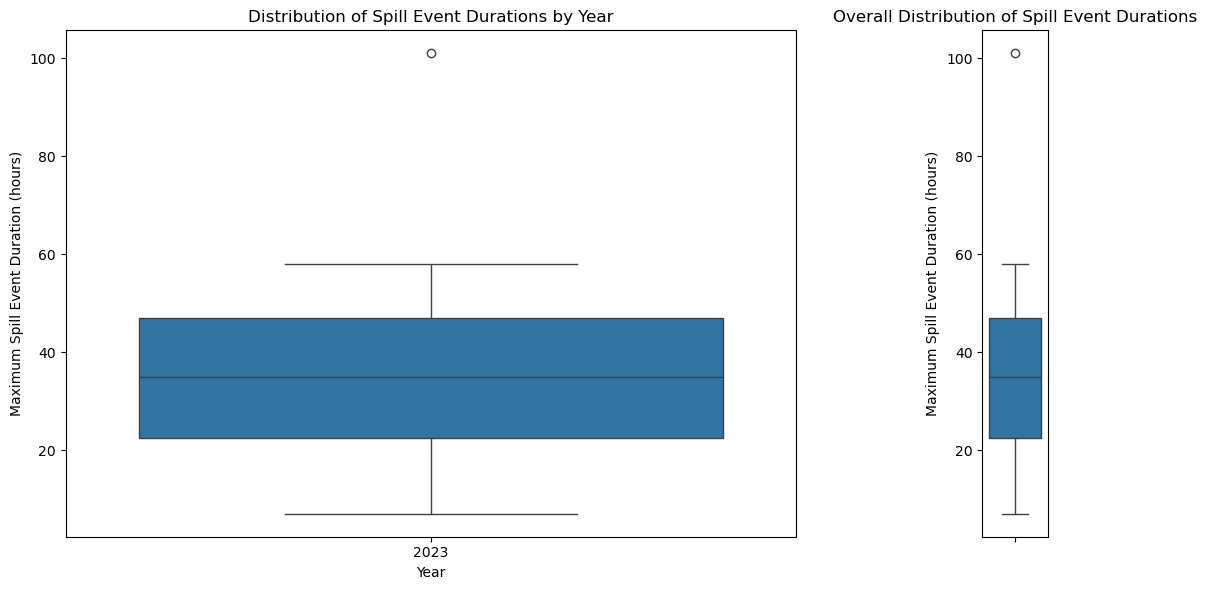

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from processing_functions import process_spill_hours

df_spill_hours = processing_functions.process_spill_hours(df_spill_hours)


# Convert spill_hours to datetime
df_spill_hours['spill_hours'] = pd.to_datetime(df_spill_hours['spill_hours'])

# Extract year from spill_hours
df_spill_hours['year'] = df_spill_hours['spill_hours'].dt.year

# Group by year and spill_event_id and get the maximum spill_event_duration for each group
max_durations = df_spill_hours.groupby(['year', 'spill_event_id'])['spill_event_duration'].max().reset_index()

# Create a box plot for the distribution of the maximum spill_event_durations for each year
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='year', y='spill_event_duration', data=max_durations)
plt.title('Distribution of Spill Event Durations by Year')
plt.xlabel('Year')
plt.ylabel('Maximum Spill Event Duration (hours)')



# Create an overall box plot for the distribution of the maximum spill_event_durations
plt.subplot(1, 2, 2)
sns.boxplot(y=max_durations['spill_event_duration'])
plt.title('Overall Distribution of Spill Event Durations')
plt.ylabel('Maximum Spill Event Duration (hours)')



plt.gca().set_aspect(0.075)

plt.tight_layout()
plt.show()


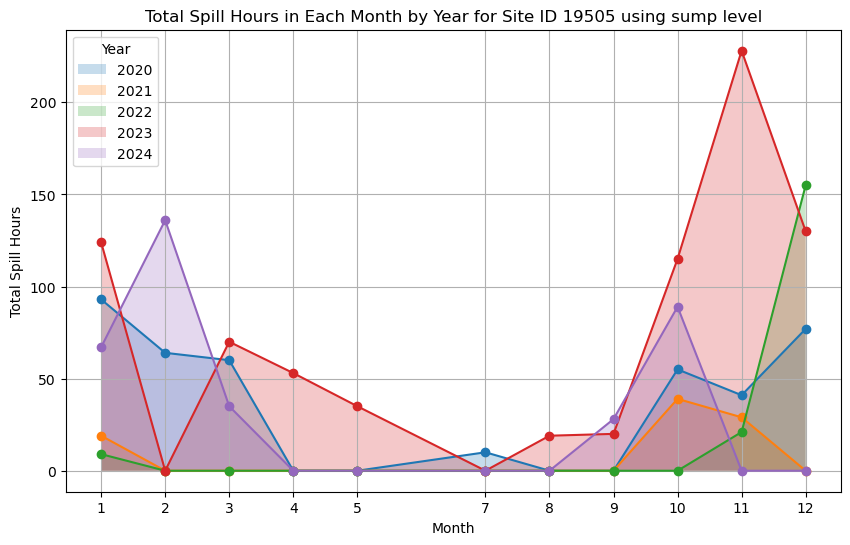

In [9]:




# Calculate total spill hours in each Month for each Year
total_spill_hours_per_month_year = df_spill_hours.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Create a bar chart of total spill hours in each Month with different colors for each Year
fig, ax = plt.subplots(figsize=(10, 6))

# Plot polygons for each Year with high transparency and add a line for each Year
for year in total_spill_hours_per_month_year.index:
    ax.fill_between(total_spill_hours_per_month_year.columns, 0, total_spill_hours_per_month_year.loc[year], alpha=0.25, label=str(year))
    ax.plot(total_spill_hours_per_month_year.columns, total_spill_hours_per_month_year.loc[year], marker='o')

# Set the x-axis labels to be the Months
ax.set_xticks(total_spill_hours_per_month_year.columns)
ax.set_xticklabels(total_spill_hours_per_month_year.columns)

ax.set_xlabel('Month')
ax.set_ylabel('Total Spill Hours')
ax.set_title(f'Total Spill Hours in Each Month by Year for Site ID {site_id_selected} using sump level')
ax.legend(title='Year')
plt.grid(True)
plt.show()



In [12]:
df_spill_hours.head(100)

,Hour,DbAddr,count,mean_EValue,stddev_EValue,min_EValue,max_EValue,5percentile,50percentile,95percentile,...,SourceSystem,Year,Month,Day,spill_hours,start_of_spill_event,spill_event_duration,spill_event_id,EA_12_24_counter,year
0,0,11943,12,100.899736,0.067438,100.750000,100.953117,100.792965,100.937500,100.953117,...,WASTE,2020,1,10,2020-01-10 00:00:00,True,1,1,1,2020
1,1,11943,12,100.445312,0.186849,100.187500,100.734383,100.204688,100.460941,100.708597,...,WASTE,2020,1,10,2020-01-10 01:00:00,False,2,1,1,2020
2,2,11943,12,99.826820,0.219708,99.437500,100.093750,99.471875,99.875000,100.085152,...,WASTE,2020,1,10,2020-01-10 02:00:00,False,3,1,1,2020
3,3,11943,12,99.097657,0.247965,98.703117,99.375000,98.737492,99.132816,99.366410,...,WASTE,2020,1,10,2020-01-10 03:00:00,False,4,1,1,2020
4,4,11943,12,98.471353,0.196159,98.203117,98.734383,98.211715,98.445309,98.725785,...,WASTE,2020,1,10,2020-01-10 04:00:00,False,5,1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,18,11943,12,100.638018,0.457190,99.718750,101.015617,99.847652,100.851559,101.007028,...,WASTE,2020,10,3,2020-10-03 18:00:00,False,3,6,11,2020
96,19,11943,12,101.001301,0.010441,100.984383,101.015617,100.984383,101.000000,101.015617,...,WASTE,2020,10,3,2020-10-03 19:00:00,False,4,6,11,2020
97,20,11943,12,100.920571,0.212831,100.281250,101.015617,100.547652,101.000000,101.015617,...,WASTE,2020,10,3,2020-10-03 20:00:00,False,5,6,11,2020
98,21,11943,12,100.973958,0.046316,100.890617,101.015617,100.907813,100.992191,101.015617,...,WASTE,2020,10,3,2020-10-03 21:00:00,False,6,6,11,2020
